# Problem Statement:
This dataset contains information about the bribes taken from public. All the information in this dataset is submitted by public of India. It contains information about department which did the corruption ,date, location, amount , views of their post and amount they were forced to give. Our job here is to do a proper analysis by first cleaning and wrangling the data then performing a detailed exploratory data analysis and deriving interesting insights using statistical analysis and visualizations.

# Importing Necessary Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# The Data

In [3]:
df=pd.read_csv("bribe_corruption.csv")
df1=df.copy()

In [4]:
df1

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000
...,...,...,...,...,...,...
3468,"I Paid Rs. 33 to Commercial Tax, Sales Tax, VA...",30-10-15,"Abohar,Punjab",C Form,2511,33
3469,I Paid Rs. 10 to Municipal Services in Jabalpur.,30-10-15,"Jabalpur,MadhyaPradesh",Birth Certificate,3985,10
3470,I Paid Rs. 500 to Income Tax in Hingoli.,30-10-15,"Hingoli,Maharashtra",New PAN Card,2733,500
3471,I Paid Rs. 800 to Municipal Services in Achhnera.,30-10-15,"Achhnera,UttarPradesh",Birth Certificate,2475,800


# Data Wrangling and EDA

In [5]:
# shape of our data
print(df1.shape)

(3473, 6)


In [6]:
# so our data 6 features and 3473 cases of bribe being paid here the title specifies small detail of
# the specifics of that particular instance, date specifies the date on which the complaint was posted,
# location specifies the city, state where the incident took place, department specifies the specfic
# department to which the bribe was paid, views state that how many people have seen this complaint,
# and finally amount specifies the total amount paid as bribe in indian rupees.

In [7]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3429 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB
None


In [8]:
# no. of missing values in each column
print(df1.isnull().sum())

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64


In [9]:
# lets check the observation with missing values
df1[df1["Department"].isnull()]

,Title,Date,Location,Department,Views,Amount(INR)
34,I paid 500rs bribe for passport police verific...,02-10-20,"NewDelhi,Delhi",NaN,1451,500
38,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
74,I paid 500rs bribe for passport police verific...,02-10-20,"NewDelhi,Delhi",NaN,1451,500
78,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
144,Bribe taken by pollution office of Raipur (CG),15-05-20,"Raipur,Chhattisgarh",NaN,1565,200000
202,Reg Husband mohamed asik given amount to socia...,25-02-20,"Madurai,TamilNadu",NaN,1848,5000
230,For Staying on the road side with motorcycle,05-02-20,"Bangalore,Karnataka",NaN,1816,200
260,Paid 500 Rs bribe at Nizamuddin Station Saraik...,10-01-20,"NewDelhi,Delhi",NaN,1926,500
278,FSO demanded for bribe through his helper,31-12-19,"Silvassa,DadraandNagarHaveli",NaN,881,15000
300,Bribe for online motation,10-12-19,"Gaya,Bihar",NaN,2138,30000


In [10]:
# from the above info we see that in most of our data there are no null values, only in department
# column few null values are there which we will handle going further, we also see that our date column
# is in object datatype format which we have to change to datetime datatype for our analysis.

In [11]:
# so the approach we take for handling the missing values since it is categorical data we can go by
# mode approach however that is not a good idea as unnecessarily we increase the burden on a particular
# department even though they might have not taken the bribe, the other approach we can go by is by
# imputing it through the title however that requires an expert to make proper and correct judgements
# so since we cannot go by any of those approaches we categorize these null values as others.

In [12]:
# filling the null values in department column as others
df1["Department"].fillna("Others",inplace=True)

In [13]:
# lets check some statistical values regarding the data especially for amount column
df1.describe(include="all")

,Title,Date,Location,Department,Views,Amount(INR)
count,3473,3473,3473,3473,3473.000000,3.473000e+03
unique,3282,1334,510,367,NaN,NaN
top,Passport verification,07-11-15,"Bangalore,Karnataka",Others,NaN,NaN
freq,10,37,769,516,NaN,NaN
mean,NaN,NaN,NaN,NaN,3379.405701,3.331083e+04
std,NaN,NaN,NaN,NaN,1540.854884,1.508203e+05
min,NaN,NaN,NaN,NaN,463.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,2081.000000,3.300000e+02
50%,NaN,NaN,NaN,NaN,3272.000000,1.200000e+03
75%,NaN,NaN,NaN,NaN,4522.000000,8.000000e+03


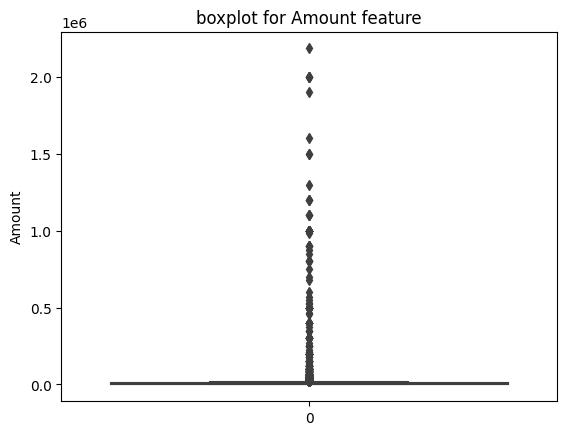

In [14]:
# lets check the distribution of bribe amount using various plots
# plotting boxplot for amount column
sns.boxplot(df1["Amount(INR)"])
plt.title("boxplot for Amount feature")
plt.ylabel("Amount")
plt.show()

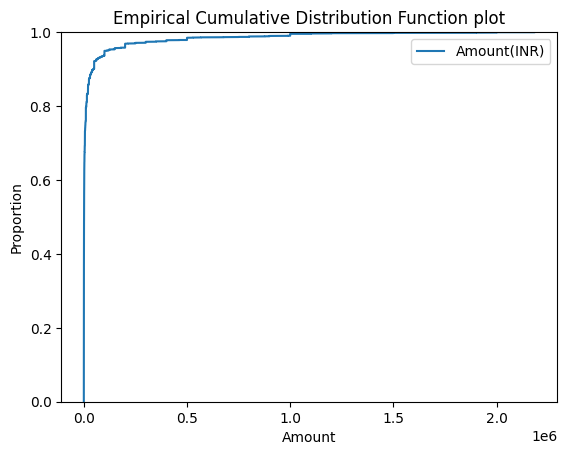

In [15]:
# plotting an empirical cumulative distribution function plot
sns.ecdfplot([df1["Amount(INR)"]])
plt.title("Empirical Cumulative Distribution Function plot")
plt.xlabel("Amount")
plt.show()

In [16]:
# from the above analysis of describe function and the plots we see that the amount of bribe ranges
# from a small value of 1 rupee to a whole 2185000 rupees with the average of 33311 rupees however
# we can see most of the bribe amounts are quite lower such as 75% of the bribes are lower or equal
# to 8000 rupees while 50% of the bribes are lower or equal to 1200 rupees and 25% of the bribes are
# lower or equal to 330 rupees so the amount of bribe contains quite a lot outliers.

In [17]:
# moving ahead considering the above analysis it is not really a good idea to pursue our analysis with
# the data containing lot of outliers, so lets remove them
q3=df1["Amount(INR)"].quantile(0.75)
q1=df1["Amount(INR)"].quantile(0.25)
iqr=q3-q1
print("lower outliers:")
print(q1-(1.5*iqr))
print()
print("higher outliers:")
print(q3+(1.5*iqr))

lower outliers:
-11175.0

higher outliers:
19505.0


In [18]:
# we can see the lower is not present in our data but we do have the higher outliers lets remove them
# from our data
high_outliers=q3+(1.5*iqr)
data=df1[df1["Amount(INR)"]<high_outliers]
data.index=range(len(data))

In [19]:
data

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000
...,...,...,...,...,...,...
2893,"I Paid Rs. 33 to Commercial Tax, Sales Tax, VA...",30-10-15,"Abohar,Punjab",C Form,2511,33
2894,I Paid Rs. 10 to Municipal Services in Jabalpur.,30-10-15,"Jabalpur,MadhyaPradesh",Birth Certificate,3985,10
2895,I Paid Rs. 500 to Income Tax in Hingoli.,30-10-15,"Hingoli,Maharashtra",New PAN Card,2733,500
2896,I Paid Rs. 800 to Municipal Services in Achhnera.,30-10-15,"Achhnera,UttarPradesh",Birth Certificate,2475,800


In [20]:
# lets check the percentage of data we are left with
no_of_records_df1=df1.shape[0]
no_of_records_data=data.shape[0]
print((no_of_records_data/no_of_records_df1)*100)

83.44370860927152


In [21]:
# we see that we are left with 83% of our data which is fair enough, we are going to continue our
# analysis on this data.

In [22]:
# now we see that the location column has the state and the city in state,city format hence we need to
# separate these two out.
data[["City","State"]]=data["Location"].str.split(",",expand=True)

In [23]:
# lets strip the column state and city of white spaces and check if there are any empty columns
data["State"]=data["State"].apply(lambda x: x.strip())
data["City"]=data["City"].apply(lambda x: x.strip())

In [24]:
for n in data["State"].unique():
    if len(n)<1:
        print(data[data["State"]==n])

                        Title      Date Location Department  Views  \
2742  I Paid Rs. 479 to  in .  07-11-15        ,     Others  12213   

      Amount(INR) City State  
2742          479             


In [25]:
for n in data["City"].unique():
    if len(n)<1:
        print(data[data["City"]==n])

                        Title      Date Location Department  Views  \
2742  I Paid Rs. 479 to  in .  07-11-15        ,     Others  12213   

      Amount(INR) City State  
2742          479             


In [26]:
# we see the same single record that is empty hence we need to remove it
data.drop(2742,axis="rows",inplace=True)

In [27]:
# setting the index
data.index=range(len(data))

In [28]:
# lets repeat the same process for department column and check if there are any columns contain empty
# string
data["Department"]=data["Department"].apply(lambda x: x.strip())
for n in data["Department"].unique():
    if len(n)<1:
        print(data[data["Department"]==n])

In [29]:
# here there is no such data.

In [30]:
# so we have a pretty clean data, lets do perform some EDA on it.

In [31]:
# First lets start grouping by cities to find out the cities with highest frequency and amount of
# bribes.
city_groupby=data.groupby("City").aggregate({"Location":lambda x: x.count(),"Amount(INR)":lambda x: x.sum()})
city_groupby.rename(columns={"Location":"frequency","Amount(INR)":"amount"},inplace=True)

In [32]:
city_groupby

,frequency,amount
City,,
Abhayapuri,46,32934
Abohar,42,80575
Achhnera,45,72771
Adari,59,97136
Adilabad,38,57861
...,...,...
Warangal,6,35100
Yadgir,2,8000
Yamunanagar,1,10000


In [33]:
# lets check the top five cities with highest frequency of bribes
city_groupby.sort_values("frequency",ascending=False).head(5)

,frequency,amount
City,,
Bangalore,641,1561821
NewDelhi,201,392320
Chennai,129,305328
Pune,112,174812
Mumbai,91,238596


In [34]:
# lets check the top five cities with highest amount of bribes
city_groupby.sort_values("amount",ascending=False).head(5)

,frequency,amount
City,,
Bangalore,641,1561821
NewDelhi,201,392320
Chennai,129,305328
Mumbai,91,238596
Hyderabad,79,227545


In [35]:
# reseting index
city_groupby.reset_index(inplace=True)

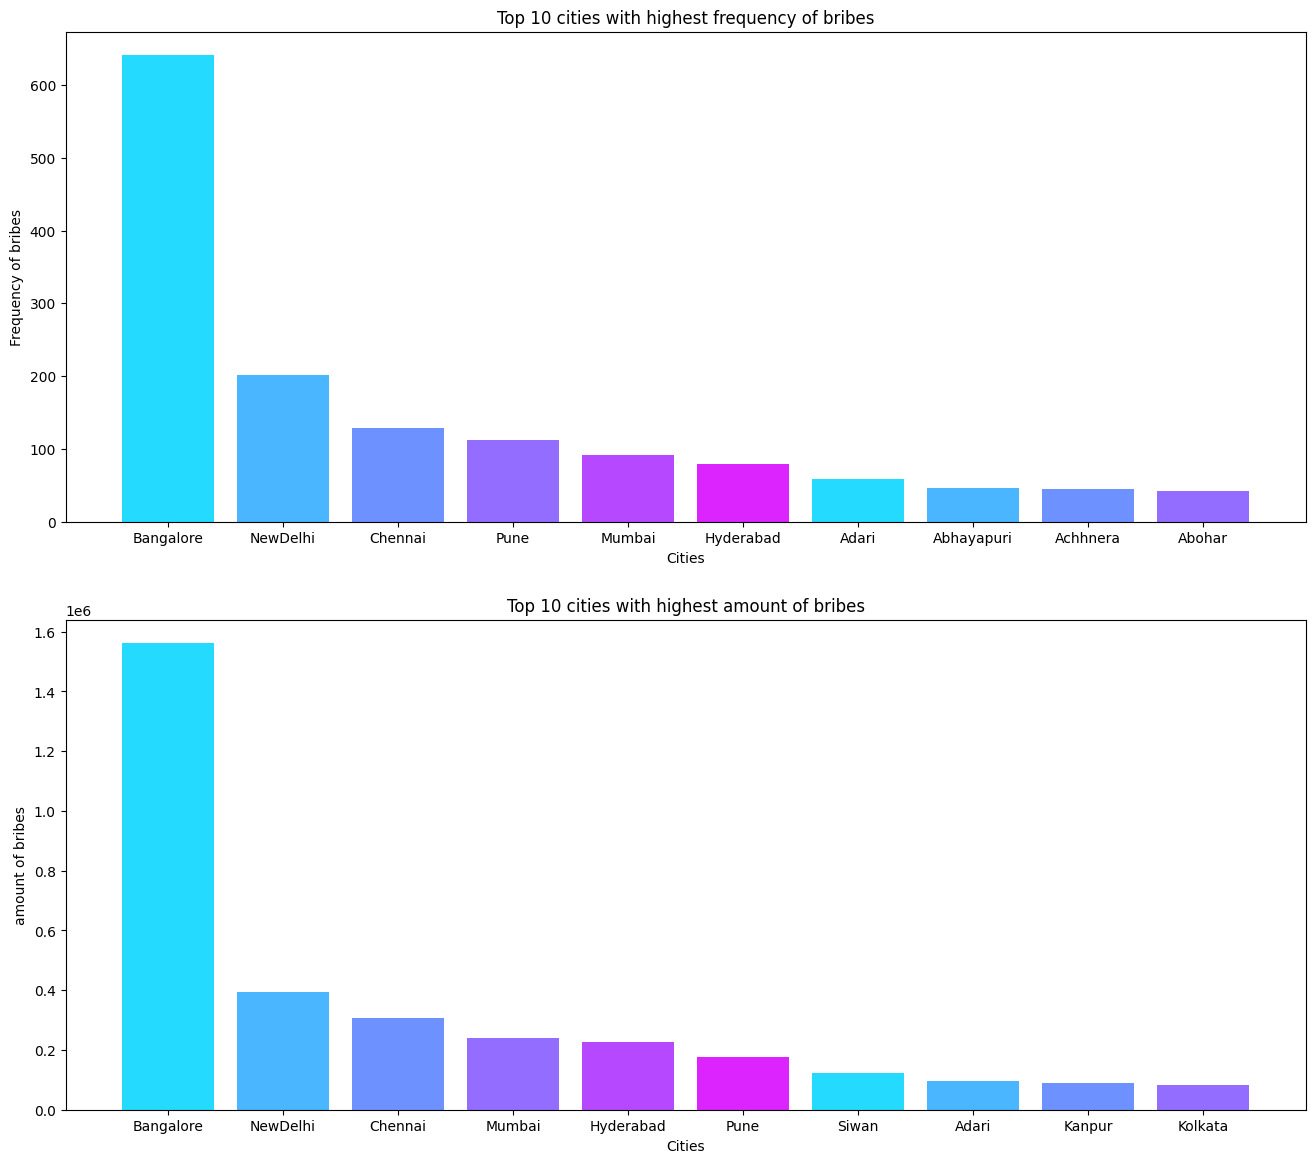

In [36]:
# lets plot top 10 cities with highest frequency and top 10 cities with highest amount of bribes
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
plt.bar(x=city_groupby.sort_values("frequency",ascending=False).head(10)["City"],height=city_groupby.sort_values("frequency",ascending=False).head(10)["frequency"],color=sns.color_palette("cool"))
plt.title("Top 10 cities with highest frequency of bribes")
plt.ylabel("Frequency of bribes")
plt.xlabel("Cities")
plt.subplot(2,1,2)
plt.bar(x=city_groupby.sort_values("amount",ascending=False).head(10)["City"],height=city_groupby.sort_values("amount",ascending=False).head(10)["amount"],color=sns.color_palette("cool"))
plt.title("Top 10 cities with highest amount of bribes")
plt.ylabel("amount of bribes")
plt.xlabel("Cities")
plt.show()

In [37]:
# now lets group by states by following the same process that we did for cities to find out states
# with highest frequency and amount of bribes
state_groupby=data.groupby("State").aggregate({"Location":lambda x: x.count(),"Amount(INR)":lambda x: x.sum()})
state_groupby.rename(columns={"Location":"frequency","Amount(INR)":"amount"},inplace=True)
# reseting index
state_groupby.reset_index(inplace=True)

In [38]:
state_groupby

,State,frequency,amount
0,AndhraPradesh,131,329117
1,ArunachalPradesh,2,3556
2,Assam,71,135135
3,Bihar,66,286349
4,Chandigarh,5,12100
5,Chhattisgarh,20,61780
6,DadraandNagarHaveli,1,15000
7,DamanandDiu,2,2000
8,Delhi,201,392320
9,Goa,17,37450


In [39]:
# lets check the top five states with highest frequency of bribes
state_groupby.sort_values("frequency",ascending=False).head(5)

,State,frequency,amount
15,Karnataka,755,1921857
28,UttarPradesh,340,734341
18,Maharashtra,320,605176
25,TamilNadu,272,646769
8,Delhi,201,392320


In [40]:
# lets check the top five states with highest amount of bribes
state_groupby.sort_values("amount",ascending=False).head(5)

,State,frequency,amount
15,Karnataka,755,1921857
28,UttarPradesh,340,734341
25,TamilNadu,272,646769
18,Maharashtra,320,605176
8,Delhi,201,392320


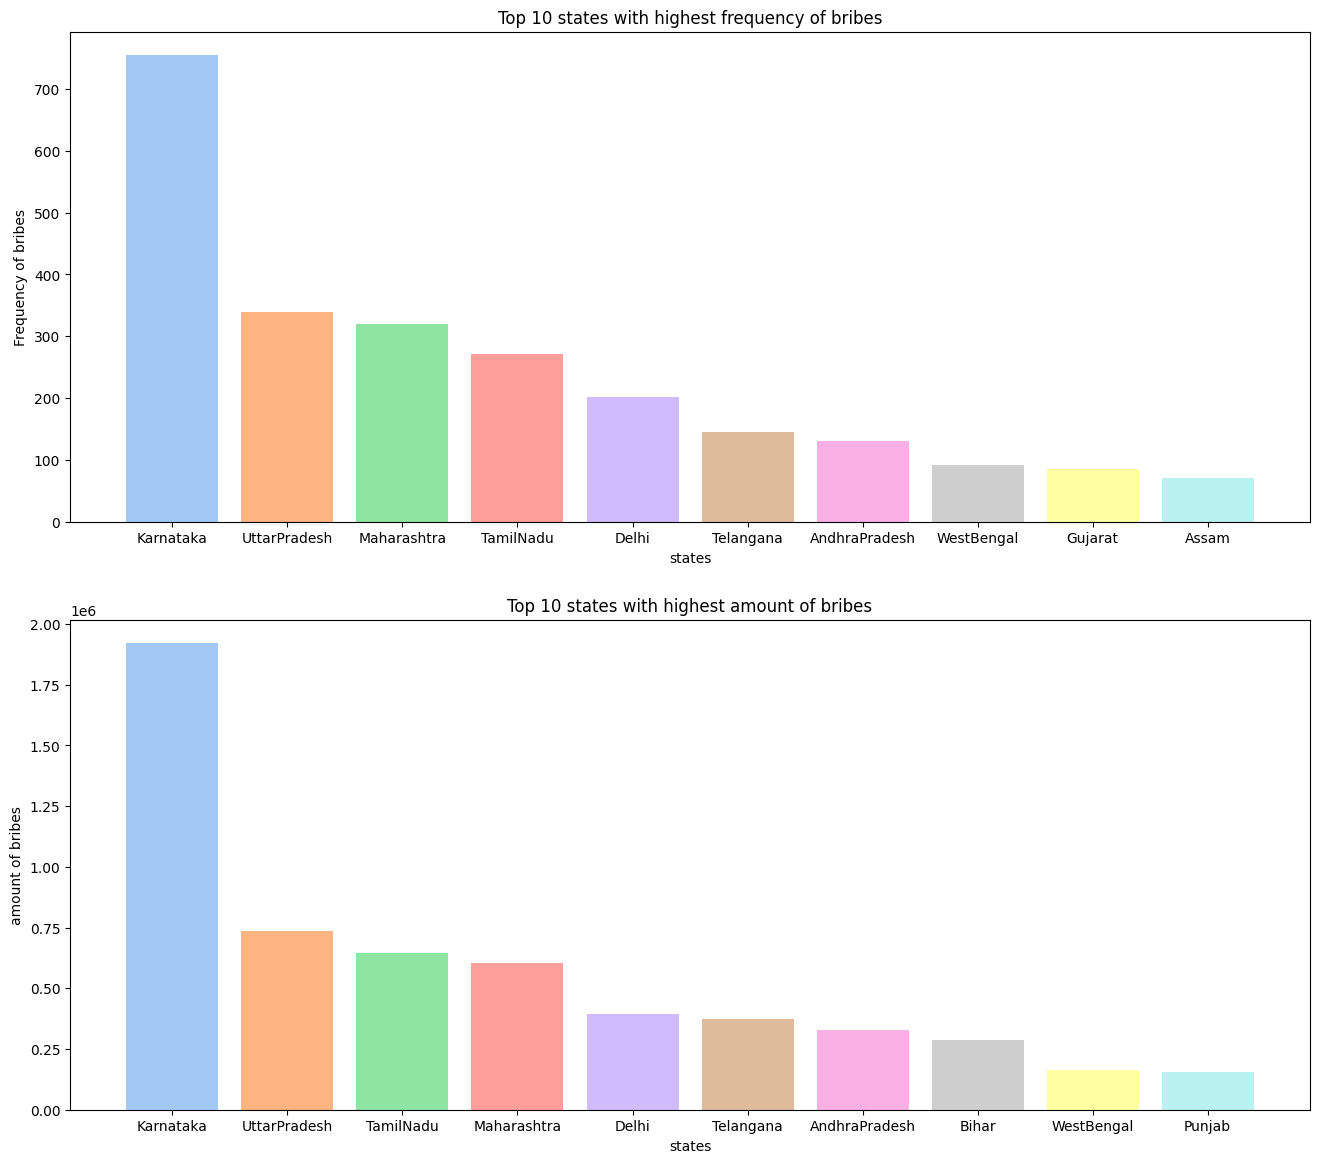

In [41]:
# lets plot top 10 states with highest frequency and top 10 states with highest amount of bribes
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
plt.bar(x=state_groupby.sort_values("frequency",ascending=False).head(10)["State"],height=state_groupby.sort_values("frequency",ascending=False).head(10)["frequency"],color=sns.color_palette("pastel"))
plt.title("Top 10 states with highest frequency of bribes")
plt.ylabel("Frequency of bribes")
plt.xlabel("states")
plt.subplot(2,1,2)
plt.bar(x=state_groupby.sort_values("amount",ascending=False).head(10)["State"],height=state_groupby.sort_values("amount",ascending=False).head(10)["amount"],color=sns.color_palette("pastel"))
plt.title("Top 10 states with highest amount of bribes")
plt.ylabel("amount of bribes")
plt.xlabel("states")
plt.show()

In [42]:
# now lets groupby departments and check the departments with high frequency and amount of bribes
dept_groupby=data.groupby("Department").aggregate({"Location":lambda x: x.count(),"Amount(INR)":lambda x: x.sum()})
# reseting index
dept_groupby.reset_index(inplace=True)

In [43]:
# renaming the columns
dept_groupby.rename(columns={"Location":"frequency","Amount(INR)":"amount"},inplace=True)

In [44]:
dept_groupby

,Department,frequency,amount
0,7/12 Extract,15,64850
1,Aadhaar Card,1,500
2,Aadhaar Card Process,14,48180
3,Aadhaar or UID Related,2,720
4,Activities on Beat,16,39770
...,...,...,...
324,Voter ID Card,3,850
325,Voter Registration,3,8670
326,Water Connection,2,11500
327,Water Connection under Sajala,2,5200


In [45]:
# lets check the top five departments with highest frequency of bribes
dept_groupby.sort_values("frequency",ascending=False).head(5)

,Department,frequency,amount
185,Others,444,934065
207,Police Verification for Passport,264,242827
295,Traffic Violations,236,189459
27,Birth Certificate,141,154212
294,"Traffic Fines, Penalties, Rules",100,121369


In [46]:
# lets check the top five departments with highest amount of bribes
dept_groupby.sort_values("amount",ascending=False).head(5)

,Department,frequency,amount
185,Others,444,934065
207,Police Verification for Passport,264,242827
237,Registration of Property,27,235100
295,Traffic Violations,236,189459
27,Birth Certificate,141,154212


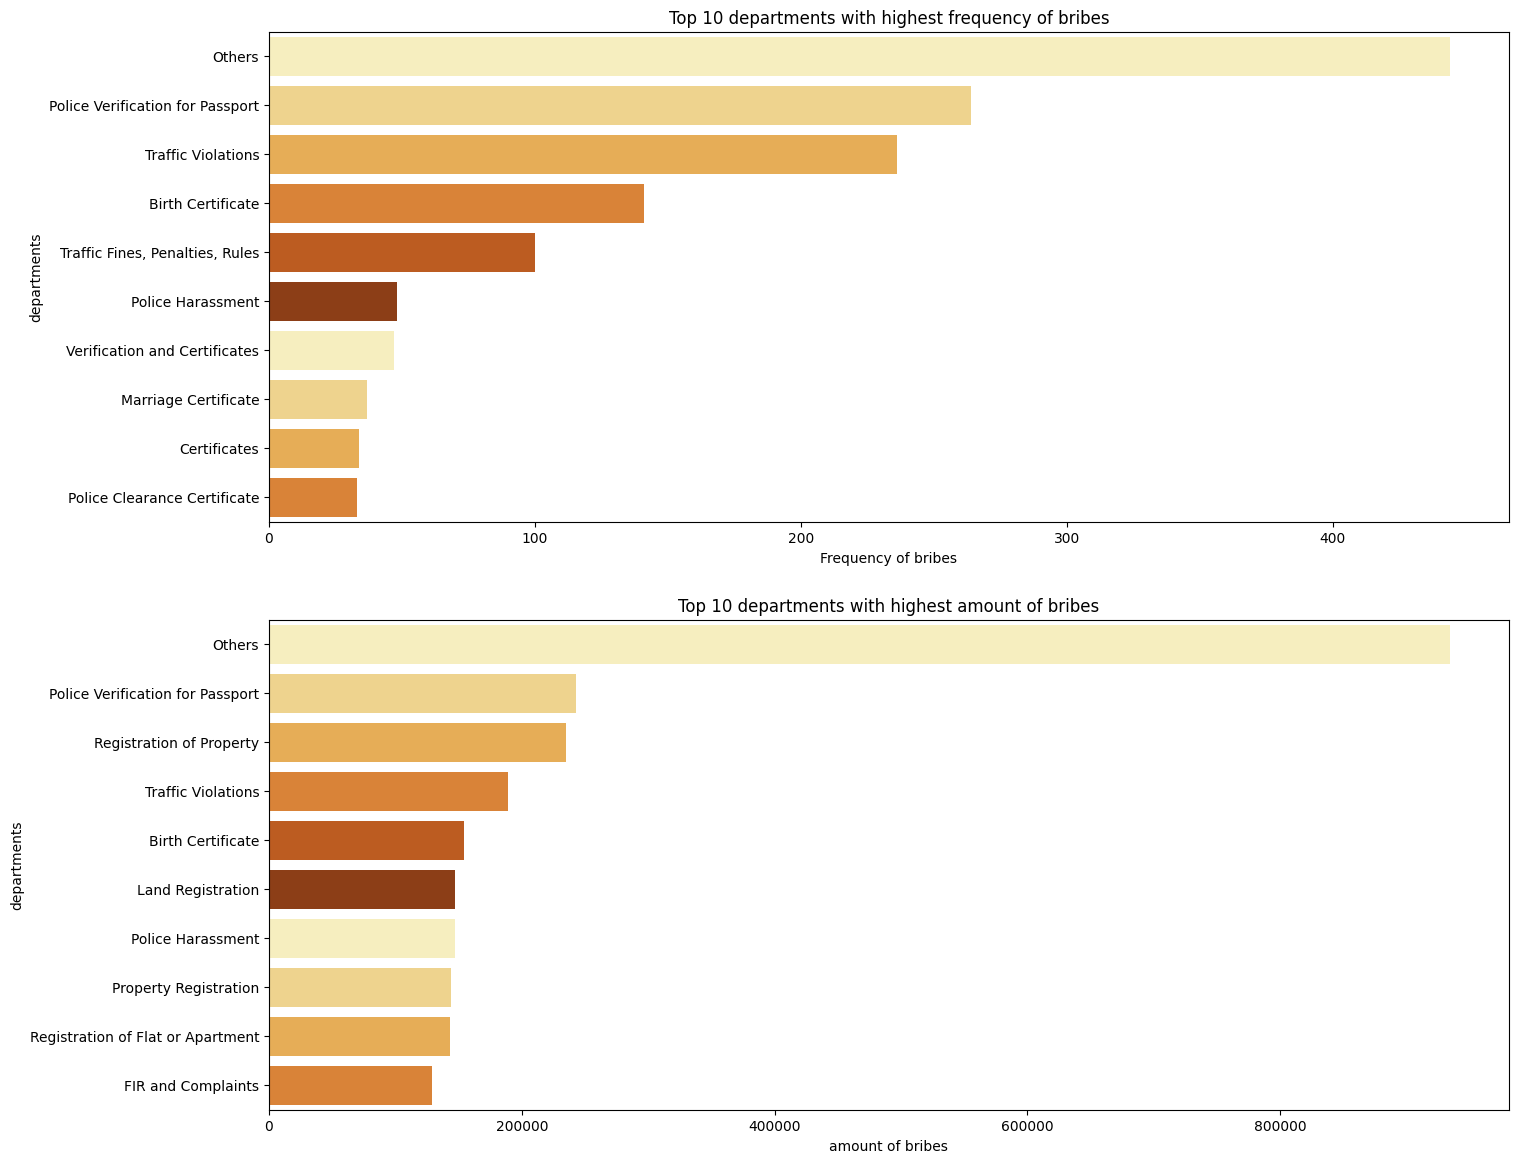

In [47]:
# lets plot top 10 departments with highest frequency and top 10 departments with highest amount of
# bribes
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.barplot(y=dept_groupby.sort_values("frequency",ascending=False).head(10)["Department"],x=dept_groupby.sort_values("frequency",ascending=False).head(10)["frequency"],orient="h",palette=sns.color_palette("YlOrBr"))
plt.title("Top 10 departments with highest frequency of bribes")
plt.xlabel("Frequency of bribes")
plt.ylabel("departments")
plt.subplot(2,1,2)
sns.barplot(y=dept_groupby.sort_values("amount",ascending=False).head(10)["Department"],x=dept_groupby.sort_values("amount",ascending=False).head(10)["amount"],orient="h",palette=sns.color_palette("YlOrBr"))
plt.title("Top 10 departments with highest amount of bribes")
plt.xlabel("amount of bribes")
plt.ylabel("departments")
plt.show()

In [48]:
# now lets start workin with the date column

In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2897 non-null   object
 1   Date         2897 non-null   object
 2   Location     2897 non-null   object
 3   Department   2897 non-null   object
 4   Views        2897 non-null   int64 
 5   Amount(INR)  2897 non-null   int64 
 6   City         2897 non-null   object
 7   State        2897 non-null   object
dtypes: int64(2), object(6)
memory usage: 181.2+ KB
None


In [50]:
# we see that our date column is in object datatype format, when need to convert this to appropriate
# type.
data["Date"]=pd.to_datetime(data["Date"])

In [51]:
# now lets check the datatype of our date column
print(data["Date"].dtype)

datetime64[ns]


In [52]:
# we see that the date column was sucessfully converted to appropriate datetime datatype

In [53]:
# now lets segregate our date column and amount column and perform time series analysis.
time_series_data=data[["Date","Amount(INR)"]]

In [54]:
time_series_data

,Date,Amount(INR)
0,2020-10-14,400
1,2020-10-13,350
2,2020-10-13,100
3,2020-10-13,100
4,2020-10-13,15000
...,...,...
2892,2015-10-30,33
2893,2015-10-30,10
2894,2015-10-30,500
2895,2015-10-30,800


In [55]:
# now lets extract the year, month, date and day of the week in a separate column from the Date column.
# now to achieve the above we would require the datetime module, so we import it
import datetime as dt
time_series_data["year"]=time_series_data["Date"].dt.year
time_series_data["month"]=time_series_data["Date"].dt.month_name()
time_series_data["date"]=time_series_data["Date"].dt.day
time_series_data["day"]=time_series_data["Date"].dt.day_name()

In [56]:
time_series_data

,Date,Amount(INR),year,month,date,day
0,2020-10-14,400,2020,October,14,Wednesday
1,2020-10-13,350,2020,October,13,Tuesday
2,2020-10-13,100,2020,October,13,Tuesday
3,2020-10-13,100,2020,October,13,Tuesday
4,2020-10-13,15000,2020,October,13,Tuesday
...,...,...,...,...,...,...
2892,2015-10-30,33,2015,October,30,Friday
2893,2015-10-30,10,2015,October,30,Friday
2894,2015-10-30,500,2015,October,30,Friday
2895,2015-10-30,800,2015,October,30,Friday


In [57]:
# now lets checkout the frequency and amount of bribe with respect to the year
groupby_year=time_series_data.groupby("year").aggregate({"Amount(INR)":lambda x: x.sum(),"Date":lambda x: x.count()})
groupby_year.reset_index(inplace=True)
groupby_year.rename(columns={"Amount(INR)":"amount","Date":"frequency"},inplace=True)

In [58]:
groupby_year

,year,amount,frequency
0,2015,456004,240
1,2016,1570136,812
2,2017,1241536,472
3,2018,1012502,411
4,2019,1715220,741
5,2020,688420,221


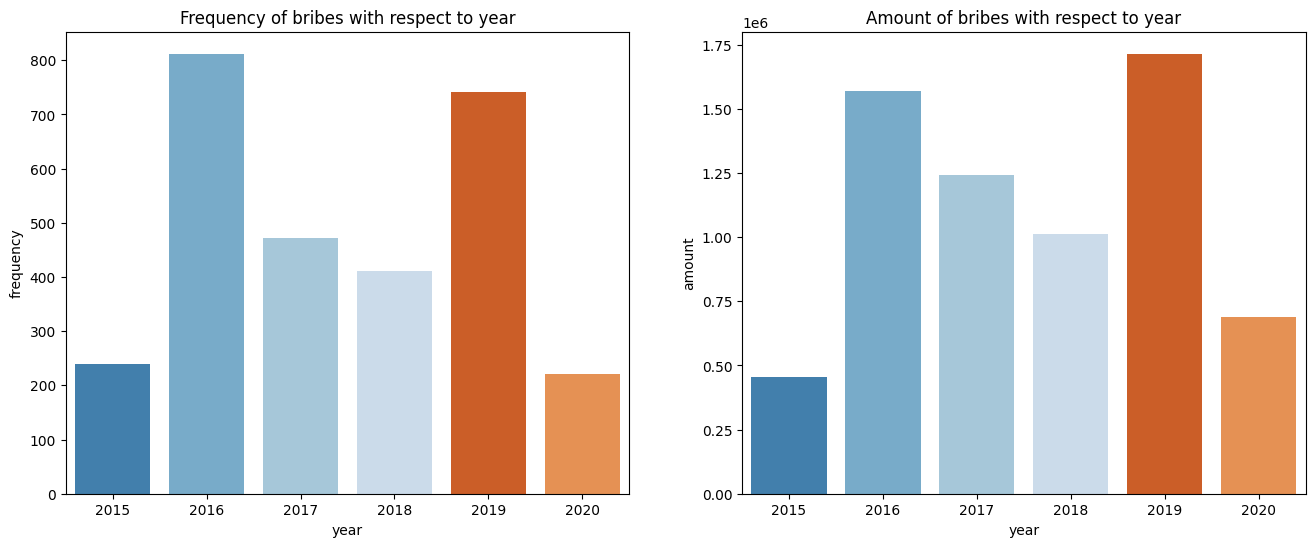

In [59]:
# lets plot this
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x=groupby_year["year"],y=groupby_year["frequency"],palette=sns.color_palette("tab20c"))
plt.title("Frequency of bribes with respect to year")
plt.subplot(1,2,2)
sns.barplot(x=groupby_year["year"],y=groupby_year["amount"],palette=sns.color_palette("tab20c"))
plt.title("Amount of bribes with respect to year")
plt.show()

In [60]:
# we see that the highest frequency of bribes is in the year 2016 closely followed by 2019
# similarly the highest amount of bribes is in the year 2019 closely followed by 2016
# basically these are the two years with highest frequency and amount of bribes.

In [61]:
# moving ahead lets checkout the frequency and amount of bribe with respect to the month
groupby_month=time_series_data.groupby("month").aggregate({"Amount(INR)":lambda x: x.sum(),"Date":lambda x: x.count()})
groupby_month.reset_index(inplace=True)
groupby_month.rename(columns={"Amount(INR)":"amount","Date":"frequency"},inplace=True)

In [62]:
groupby_month

,month,amount,frequency
0,April,446142,222
1,August,696982,254
2,December,540275,219
3,February,478217,246
4,January,542804,260
5,July,559659,239
6,June,540533,226
7,March,700967,320
8,May,453853,228
9,November,526994,220


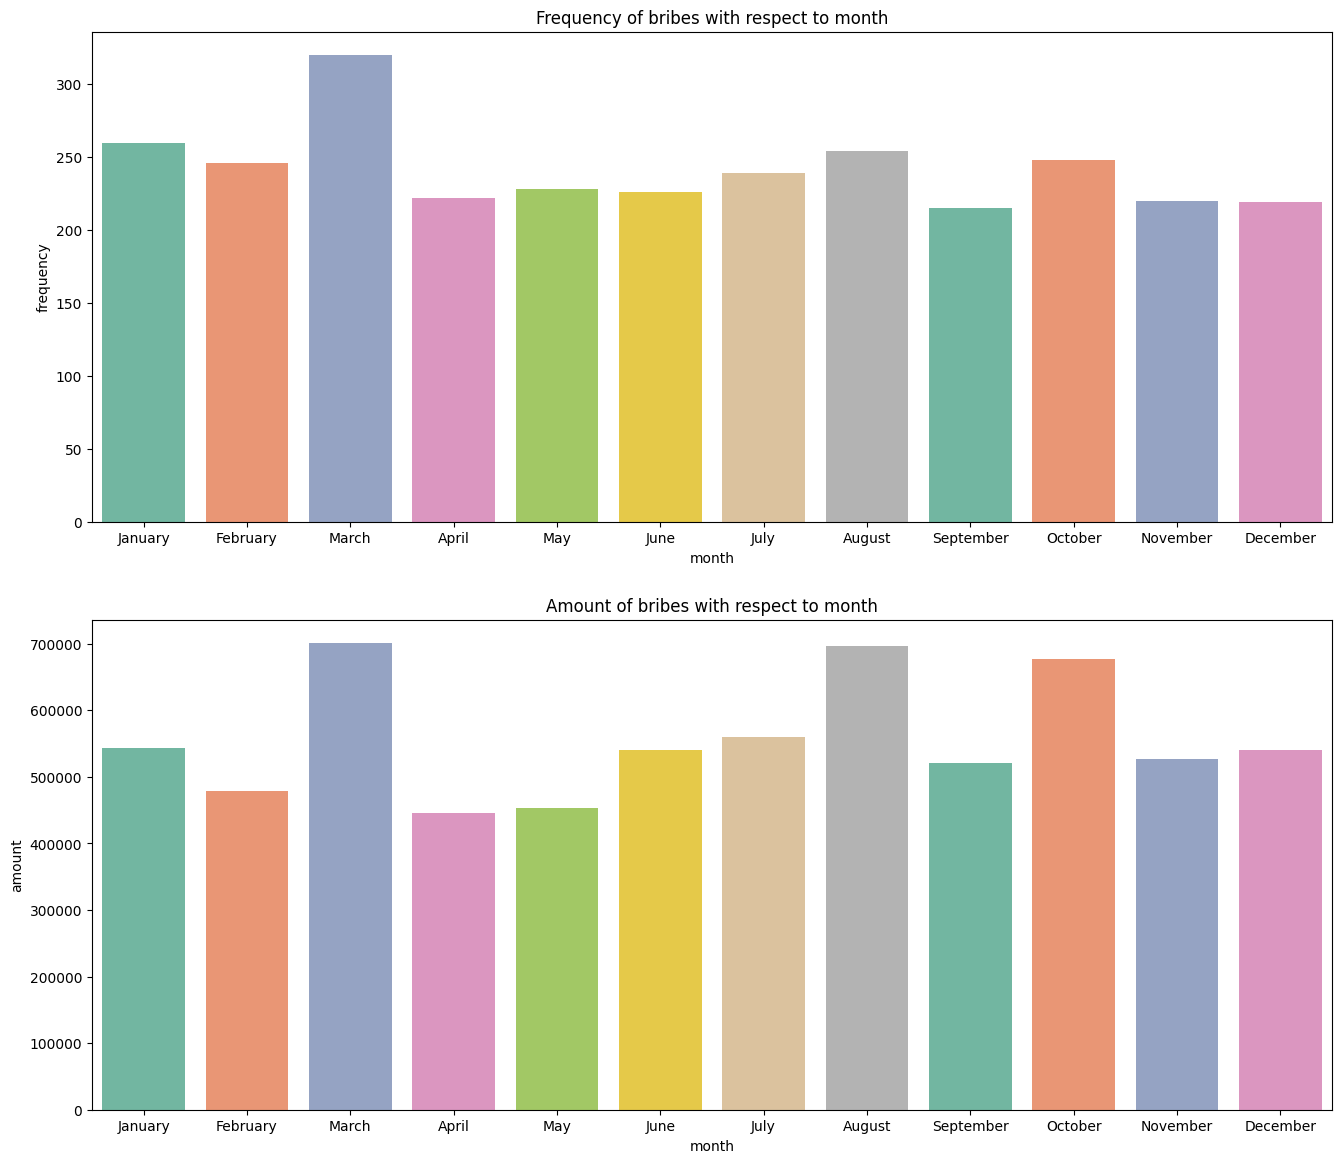

In [63]:
# lets plot this on a graph
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.barplot(x=groupby_month["month"],y=groupby_month["frequency"],order=["January","February","March","April","May","June","July","August","September","October","November","December"],palette=sns.color_palette("Set2"))
plt.title("Frequency of bribes with respect to month")
plt.subplot(2,1,2)
sns.barplot(x=groupby_month["month"],y=groupby_month["amount"],order=["January","February","March","April","May","June","July","August","September","October","November","December"],palette=sns.color_palette("Set2"))
plt.title("Amount of bribes with respect to month")
plt.show()

In [64]:
# we see that month dont really influence the frequency or amount of bribe, however we still notice
# that the frequency and amount of bribes are quite high in the month of march.

In [65]:
# now lets checkout the frequency and amount of bribe with respect to the date.
groupby_date=time_series_data.groupby("date").aggregate({"Amount(INR)":lambda x: x.sum(),"Date":lambda x: x.count()})
groupby_date.reset_index(inplace=True)
groupby_date.rename(columns={"Amount(INR)":"amount","Date":"frequency"},inplace=True)

In [66]:
groupby_date

,date,amount,frequency
0,1,225106,101
1,2,176911,79
2,3,248748,105
3,4,229300,85
4,5,188402,77
5,6,222049,82
6,7,204887,83
7,8,266199,92
8,9,185490,78
9,10,233096,88


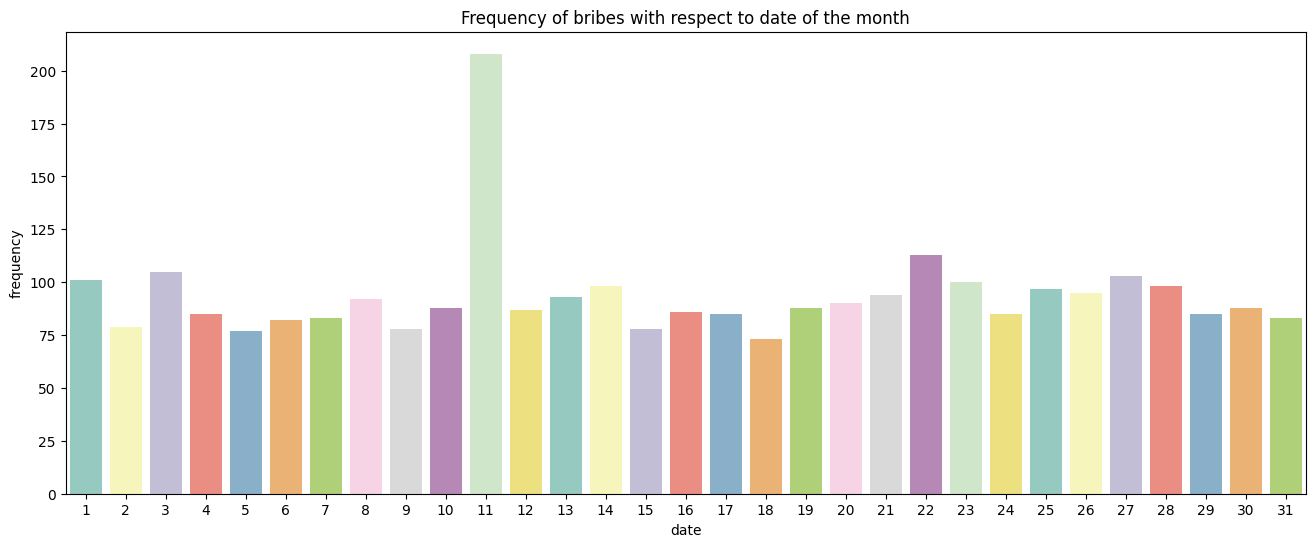

In [67]:
# plotting the frequency with respect to date of the month
plt.figure(figsize=(16,6))
sns.barplot(x=groupby_date["date"],y=groupby_date["frequency"],palette=sns.color_palette("Set3"))
plt.title("Frequency of bribes with respect to date of the month")
plt.show()

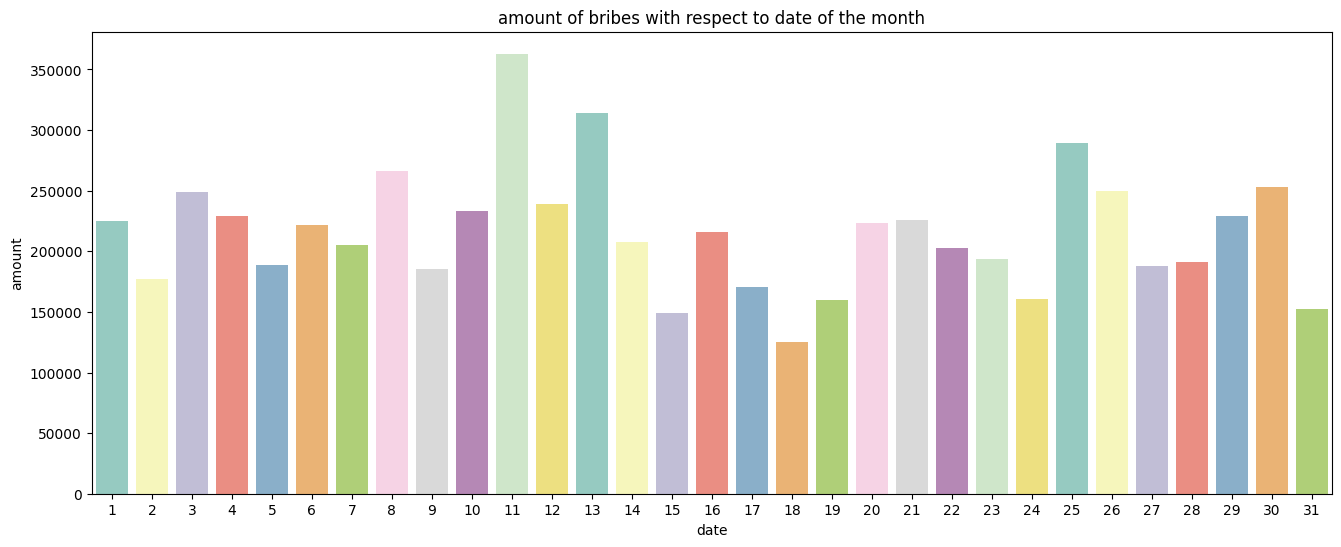

In [68]:
# plotting the amount of bribe with respect to date of the month
plt.figure(figsize=(16,6))
sns.barplot(x=groupby_date["date"],y=groupby_date["amount"],palette=sns.color_palette("Set3"))
plt.title("amount of bribes with respect to date of the month")
plt.show()

In [69]:
# from the above we see that there is again no influence in the frequency or amount of bribes with
# respect to day of the month, however we can't fail to notice the sudden hike in frequency of bribes
# on the 11th day of the month, that is the frequency is almost close to double.

In [70]:
# lets finally checkout the frequency and amount of bribe with respect to the day of the week.
groupby_day=time_series_data.groupby("day").aggregate({"Amount(INR)":lambda x: x.sum(),"Date":lambda x: x.count()})
groupby_day.reset_index(inplace=True)
groupby_day.rename(columns={"Amount(INR)":"amount","Date":"frequency"},inplace=True)

In [71]:
groupby_day

,day,amount,frequency
0,Friday,808905,385
1,Monday,955451,407
2,Saturday,1122409,468
3,Sunday,694563,286
4,Thursday,870906,388
5,Tuesday,1110562,482
6,Wednesday,1121022,481


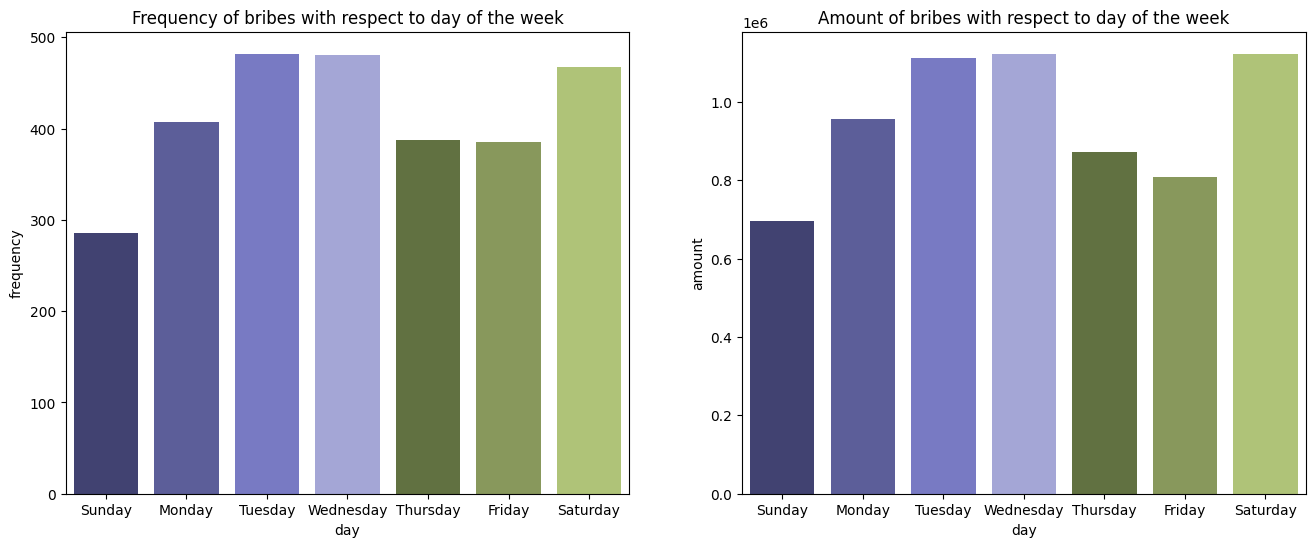

In [73]:
# now lets plot this
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x=groupby_day["day"],y=groupby_day["frequency"],order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],palette=sns.color_palette("tab20b"))
plt.title("Frequency of bribes with respect to day of the week")
plt.subplot(1,2,2)
sns.barplot(x=groupby_day["day"],y=groupby_day["amount"],order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],palette=sns.color_palette("tab20b"))
plt.title("Amount of bribes with respect to day of the week")
plt.show()

In [ ]:
# even here we do not see any trend in frequency or amount of bribes, though we see a gradual rise in
# amount and frequency of bribes from sunday to wednesday then a sudden decrease in friday and thursday
# and again sudden increase on saturday followed by decrease on sunday again.